In [0]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
#import pandas as np
import matplotlib.pyplot as plt
%matplotlib inline

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


IMAGE PREPROCESSING


In [0]:
print(os.listdir("/content/drive/My Drive/Colab Notebooks/chest_xray/"))

print(os.listdir("/content/drive/My Drive/Colab Notebooks/chest_xray/train/"))

print(os.listdir("/content/drive/My Drive/Colab Notebooks/chest_xray/test"))

['train', 'test', 'val', '.DS_Store']
['PNEUMONIA', 'NORMAL', '.DS_Store']
['PNEUMONIA', 'NORMAL', '.DS_Store']


NORMAL


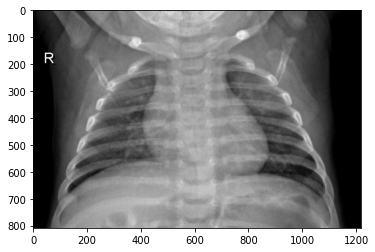

<class 'numpy.ndarray'>
(808, 1218, 3)
<class 'tuple'>
<class 'tuple'>


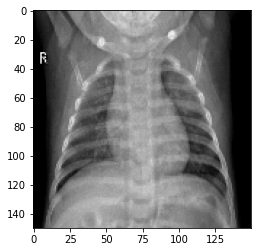

In [0]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()
import cv2

im = cv2.imread('/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/' + img_name)

print(type(im))
# <class 'numpy.ndarray'>

print(im.shape)
print(type(im.shape))
output1 = cv2.resize(im, (150,150))
print(type(output1.shape))
#print(output)
plt.imshow(output1)
plt.show()
#print(im)
#output/=255.0

In [0]:
#from numpy import prod
dimData = np.prod(output.shape)
print(dimData)
#print(output.shape[0])
output = output.reshape(-1)
print(output)
output=output.astype('float')
#plt.imshow(output[:])
plt.show()
#output/=255.0
#print(output)

67500
[16 16 16 ...  0  0  0]


For all images


In [0]:
from PIL import Image
import glob
c=0
train_images=[]
train_labels=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/*.jpeg'): #assuming gif
    #img_normal = load_img(filename)
    #print(img_normal)
    img_normal = cv2.imread(filename,0)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (150,150))
    train_images.append([output])
    train_labels.append(0)
    c=c+1
    print(c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


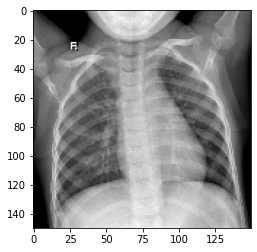

3875


In [0]:
#help(cv2.imread)
plt.imshow(output,cmap="gray")
plt.show()
c=0
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/PNEUMONIA/*.jpeg'): #assuming gif
    #img_normal = load_img(filename)
    img_normal = cv2.imread(filename,0)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (150,150))
    train_images.append([output])
    train_labels.append(1)
    c=c+1
print(c)

In [0]:
len(train_images)
train_data=[]
for x in train_images:
  train_data.append(x)
train_data=np.array(train_data).reshape(-1,150,150,1)
train_data.shape

(5216, 150, 150, 1)

In [0]:
#type(output)
#dimData = np.prod(train_images.shape[1:])
#print(dimData)
#print(train_images.shape[1:])
#print(len(train_images))
#print(len(train_labels))
#plt.imshow(train_images[3])
#plt.show()
#print(train_images[0].shape)
#dimData = np.prod(train_images[0].shape)
#print(dimData)
#print(len(train_images))
#train_data = train_images[0:].reshape(train_images[0:].shape,dimData)
#print(type(train_data[0].shape[0]))
#print(train_images[0].shape)

test data processing


In [0]:
c=0
test_images=[]
test_labels=[]
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/test/NORMAL/*.jpeg'): #assuming gif
    #img_normal = load_img(filename)
    #print(img_normal)
    img_normal = cv2.imread(filename,0)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (150,150))
    test_images.append([output])
    test_labels.append(0)
    c=c+1
    print(c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234


In [0]:
c=0
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/test/PNEUMONIA/*.jpeg'): #assuming gif
    #img_normal = load_img(filename)
    img_normal = cv2.imread(filename,0)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (150,150))
    test_images.append([output])
    test_labels.append(1)
    c=c+1
print(c)

390


In [0]:
len(test_images)
test_data=[]
for x in test_images:
  test_data.append(x)
test_data=np.array(test_data).reshape(-1,150,150,1)
test_data.shape
dimData = np.prod(train_data.shape[1:])
print(dimData)
train_data = train_data.reshape(train_data.shape[0],dimData)
train_data.shape
test_data = test_data.reshape(test_data.shape[0],dimData)
test_data.shape

22500


(624, 22500)

Scaling the data

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_data /=255.0
test_data /=255.0

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
train_data.shape

(5216, 22500)

MODEL

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=100, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5216 samples, validate on 624 samples
Epoch 1/100





5216/5216 [==============================] - 12s 2ms/step - loss: 0.6119 - acc: 0.7429 - val_loss: 0.5687 - val_acc: 0.7516
Epoch 2/100
5216/5216 [==============================] - 8s 1ms/step - loss: 0.5875 - acc: 0.7124 - val_loss: 0.9200 - val_acc: 0.7756
Epoch 3/100
5216/5216 [==============================] - 8s 1ms/step - loss: 0.4949 - acc: 0.7722 - val_loss: 1.8833 - val_acc: 0.7372
Epoch 4/100
5216/5216 [==============================] - 8s 1ms/step - loss: 0.4262 - acc: 0.8144 - val_loss: 1.8583 - val_acc: 0.8061
Epoch 5/100
5216/5216 [==============================] - 8s 1ms/step - loss: 0.3763 - acc: 0.8472 - val_loss: 2.0470 - val_acc: 0.7756
Epoch 6/100
5216/5216 [==============================] - 8s 1ms/step - loss: 0.3594 - acc: 0.8560 - val_loss: 3.2682 - val_acc: 0.6891
Epoch 7/100
5216/5216 [=================

In [0]:
import pickle
with open("/content/drive/My Drive/Colab Notebooks/chest_xray/First_Model.pk1",'wb') as file:
      pickle.dump(model,file)


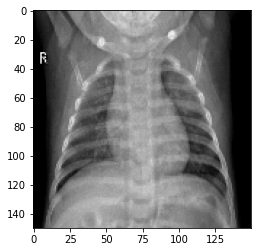

In [0]:
#test_data.shape
plt.imshow(output1,cmap='gray')
plt.show()
#plt.imshow(test_data[5,:,:],cmap='gray')
#plt.title('Ground Truth : {}'.format(test_labels[5]))
#plt.show()
#print(type(test_images[5,:,:]))

(150, 150)
(150, 150)


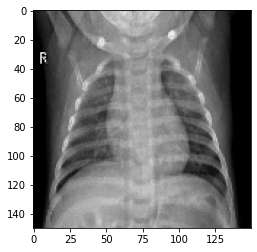

[[ 16  17  27  36  36  44  39  41  49  96 102 100  81  87  82  73  82  99
   89  59  52  49  49  96 123 134 137 140 140 139 142 139 131 134 130 125
  120 111 118 149 144 135 131 129 144 142 177 205 177 177 182 171 176 176
  191 174 199 180 183 202 202 176 181 203 188 187 182 177 143 165 162 183
  188 190 183 203 178 190 192 210 210 218 205 201 204 191 197 193 151 159
  154 148 150 145 138 135 130 127 161 156 141 129 117 109 113 125 128 134
  143 135 115  63  60  64  81  99  93  86  94  94  98  83  96  81  86  78
   42  48  51  48  49  47  44  30  27  22  17  15  10   8   7   4   1   0
    0   0   0   0   0   0]]


In [0]:
print(output1.shape)
otp = cv2.imread('/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/' + img_name,0)
    #print(im.shape)
    #print(type(im.shape))
output1 = cv2.resize(otp, (150,150))
print(output1.shape)
plt.imshow(output1,cmap='gray')
plt.show()
print(output1[[0],:])
output1

In [0]:
x=model.predict_classes(test_data[[4],:])
print(x)

[1]


making image suitable for prediction

In [0]:
output1 = output1.astype('float')
output1 /=255.0
print(type(output1))
output1=np.array(output1).reshape(-1,150,150,1)
output1.shape
output1 = output1.reshape(output1.shape[0],dimData)
output1.shape
output1[[0],:]


<class 'numpy.ndarray'>


array([[5.39731789e-26, 5.73465026e-26, 9.10797394e-26, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [0]:
test_data[[4],:]

array([[0.1372549 , 0.1254902 , 0.10196078, ..., 0.12941176, 0.12941176,
        0.11764706]])

In [0]:
y=model.predict_classes(output1[[0],:])
print(y)

[1]
